In [1]:
from lib.controller import Controller
from lib.automation import FileDetector
import time
import os
from lib.utilities import *

In [2]:
data_dir = "C:/Users/jjudge3/Desktop/Data/06-21-22/"
camera_program = 4

In [3]:
# read in non-normalized maps exported from PhotoZ: 
#  pre-stim SNR, stim SNR, and stim MaxAmp

1-1.tif
{'points_per_trace': 0, 'img_type': 'i', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 1, 'location_number': 1}
1-1e.tif
{'points_per_trace': 0, 'img_type': 'e', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 1, 'location_number': 1}
1-1f.tif
{'points_per_trace': 0, 'img_type': 'f', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 1, 'location_number': 1}
2-1.tif
{'points_per_trace': 0, 'img_type': 'i', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 2, 'location_number': 1}
2-1e.tif
{'points_per_trace': 0, 'img_type': 'e', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 2, 'location_number': 1}
2-1f.tif
{'points_per_trace': 0, 'img_type': 'f', 'interval_between_samples': 0, 'raw_width': 0, 'raw_height': 0, 'slice_number': 2, 'location_number': 1}
3-1.tif
{'points_per_trace': 0, 'img_type': 'i', 'interval_between_sampl

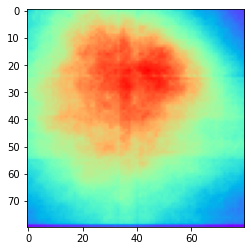

In [4]:
# read in 8-bit single images to array, apply same cropping/binning
dic_dir = data_dir + "dic/"
single_images = {}

cam_settings = CameraSettings().get_program_settings(camera_program)
binning = int(cam_settings['height'] / 80)
for filename in os.listdir(dic_dir):
    if filename.endswith(".tif"):
        sd = Dataset(dic_dir + filename)
        sd.clip_data(y_range=cam_settings['cropping'],
                    t_range=[0,1])
        sd.bin_data(binning=binning)
        img = sd.get_data()
        meta = sd.get_meta()
        slic = meta['slice_number']
        loc = meta['location_number']
        img_type = meta['img_type']
        if slic not in single_images:
            single_images[slic] = {}
        if loc not in single_images[slic]:
            single_images[slic][loc] = {}
        
        single_images[slic][loc][img_type] = img
        plt.imshow(single_images[slic][loc][img_type][0,0,:,:],
                  cmap="rainbow")
